Sales Prediction Width Linear Regression

In [2]:
!pip install scikit-learn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# tüm veriyi float biçimde göstermesi için : 9.22 gibi
pd.set_option('display.float_format', lambda x:'%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split,cross_val_score

In [5]:
df=pd.read_csv('datasets/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,12.00
3,151.50,41.30,58.50,16.50
4,180.80,10.80,58.40,17.90
...,...,...,...,...
195,38.20,3.70,13.80,7.60
196,94.20,4.90,8.10,14.00
197,177.00,9.30,6.40,14.80
198,283.60,42.00,66.20,25.50


In [10]:
X=df[['TV']]
y=df[['Sales']]


In [ ]:
reg_model=LinearRegression()

reg_model.fit(X,y)

LinearRegression()

In [ ]:
# bias değeri
reg_model.intercept_[0] # b değeri

6.974821488229891

In [ ]:
# tahmin= b + w*TV
reg_model.coef_[0][0] # w değeri

0.055464770469558874

In [ ]:
# 150 TL lik TV nin  tahmini satışı
reg_model.intercept_[0] + reg_model.coef_[0][0] * 150

34.70720672300933

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
Radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
Newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
Sales,200.00,15.13,5.28,1.60,11.00,16.00,19.05,27.00


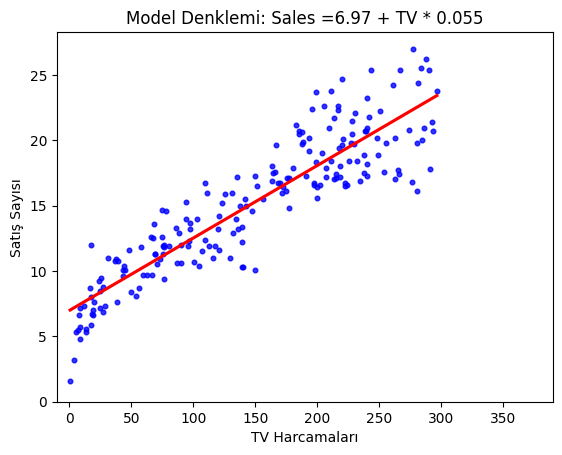

In [66]:
ax = sns.regplot(x=X,y=y, scatter_kws={'color':'b', 's':11}, ci=False, color='r')

ax.set_title(f"Model Denklemi: Sales ={round(reg_model.intercept_[0],2)} + TV * {round(reg_model.coef_[0][0],3)}")
ax.set_ylabel("Satış Sayısı")
ax.set_xlabel("TV Harcamaları")
plt.xlim(-10,390)
plt.ylim(bottom=0)# y ekseninin başlama noktası
plt.show()

MSE


In [70]:
y_pred=reg_model.predict(X)
mean_squared_error(y,y_pred)

5.2177438977951285

In [72]:
print(y.mean())
print(y.std())

Sales   15.13
dtype: float64
Sales   5.28
dtype: float64


RMSE


In [73]:
np.sqrt(mean_squared_error(y,y_pred))

2.2842381438447106

MAE

In [74]:
mean_absolute_error(y,y_pred)

1.8305872641932412

R-KARE

In [76]:
reg_model.score(X,y)

0.8121757029987414